# Funções de perda

Perda é a penalidade para uma previsão ruim. Ou seja, **perda** é um número que indica quão ruim foi a previsão do modelo em um único exemplo. Se a previsão do modelo for perfeita, a perda será zero. Caso contrário, a perda será maior.

## Perda quadrada
MSE = É o quadrado da diferença entre o rótulo e a previsão

y = rótulo
y' = previsto

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def mse(y: np.array, y_predict: np.array):
    return np.square((y - y_predict)) / y.size

In [9]:
y = np.array([1, 5, 3, 4, 7, 2, 4, 4])
y_predict = np.array([1, 3, 4, 2, 5, 3, 7, 8])

mse(y, y_predict).sum()

4.875

## Gradiente descendente

Gradiente descendente é um algoritmo de otimização genérico que consegue identificar ótimas soluções para um leque amplo de problemas. A ideia geral do gradiente descendente é ajustar iterativamente os parâmetros com o intuito de minimizar uma função de custo.


![](images/gradient_descent.jpeg)

O modelo inicia com uma suposição aleatória *w1 é 0.* E esperá que o sistema diga qual foi a perda Depois, você tentará outra adivinha *w1 é 0,5.* e verá qual é a perda. O verdadeiro objetivo é tentar encontrar o melhor modelo possível da maneira mais eficiente possível.

A figura a seguir sugere o processo iterativo de tentativa e erro que os algoritmos de machine learning usam para treinar um modelo.

![](images/GradientDescentDiagram.png)

In [20]:
X = np.array([1, 3, 4, 2, 5, 3, 7, 8])

def cal_cost(theta, X: np.array, y: np.array):
    m = y.size

    predictions = X * theta
    cost = (0.5*m) * np.sum(predictions - y)
    return cost

cal_cost(2, X, y)

144.0

In [21]:
def gradient_descent(X: np.array, y: np.array, theta, learning_rate=0.01, iterations=100):
    m = y.size
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = X * theta
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history, theta_history

In [24]:
theta, cost_history, theta_history = gradient_descent(X, y, 1, 0.01, 100)

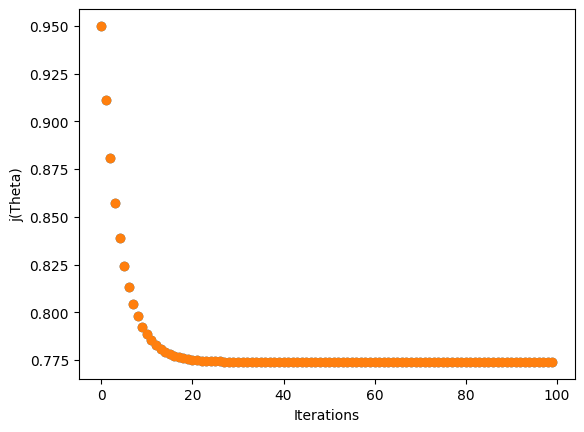

In [36]:
fig, ax = plt.subplots()
ax.set_ylabel('j(Theta)')
ax.set_xlabel('Iterations')
ax.plot(theta_history, 'o')

Conforme observado, o vetor de gradiente tem uma direção e uma magnitude. Os algoritmos de gradiente descendente multiplicam o gradiente por um escalar conhecimento como **taxa de aprendizado**, também conhecida como **tamanho da etapa**, para determinar o próximo ponto. Por exemplo, se a magnitude do gradiente for 2,5 e a taxa de aprendizado for 0,01, o algoritmo do gradiente descendente vai escolher o próximo ponto a 0,025 do ponto anterior.

![](images/gradient_descent02.png)